In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/Users/youngbin/miniconda3/envs/ybml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist.data, mnist.target

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
from sklearn.linear_model import SGDClassifier

In [5]:
sgd_clf = SGDClassifier(random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [16]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

In [19]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [20]:
from sklearn.model_selection import GridSearchCV

In [25]:
from scipy.stats import expon, loguniform

from sklearn.pipeline import Pipeline

In [32]:
param_grid = {
                 'knn__weights': ['uniform', 'distance'],
                 'knn__n_neighbors': [3, 4, 5, 6, 8]
             }
pipeline = Pipeline([
        ("knn",  KNeighborsClassifier())
    ])
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring="accuracy")

In [33]:
grid_search.fit( X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 4, 5, 6, 8],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
grid_search.best_score_

0.9703500000000002

In [35]:
grid_search.best_params_

{'knn__n_neighbors': 4, 'knn__weights': 'distance'}

In [36]:
grid_search.best_estimator_

Pipeline(steps=[('knn',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

In [37]:
grid_search.best_index_

3

In [38]:
grid_search.best_estimator_.score(X_test, y_test)

0.9714

In [42]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


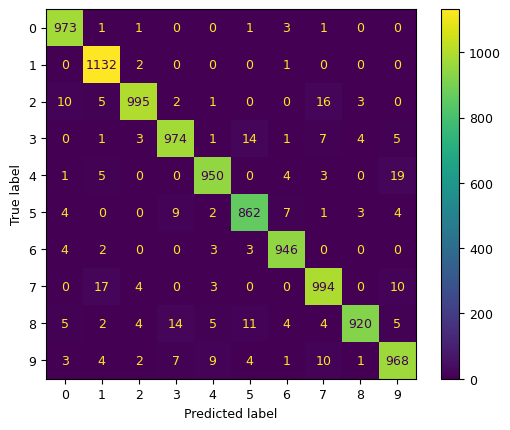

In [47]:
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

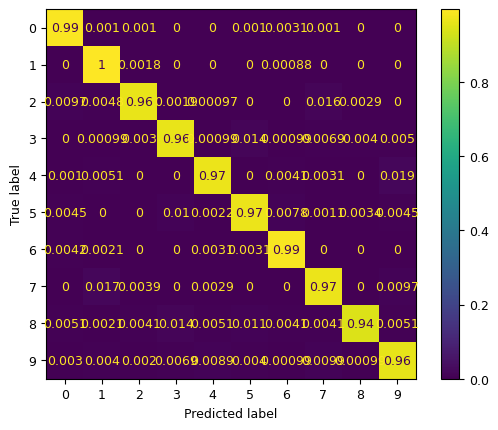

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true")

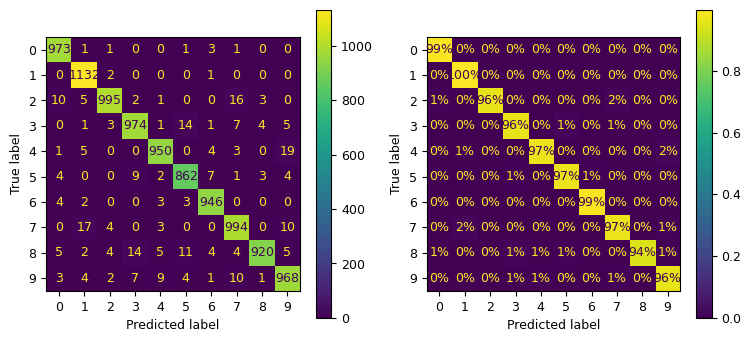

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sample_weight = (y_test_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")

Text(0.5, 1.0, 'Errors normalized by row')

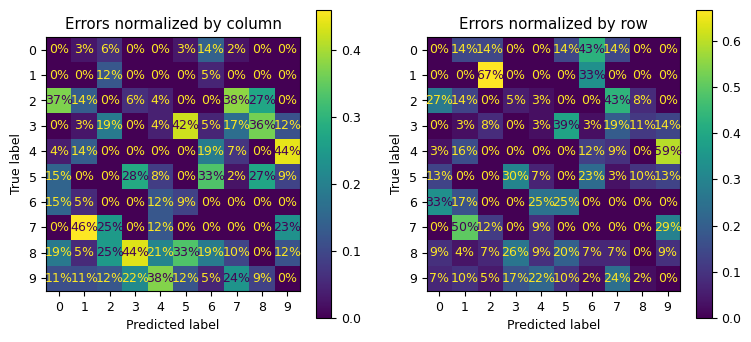

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sample_weight = (y_test_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[0], sample_weight=sample_weight, normalize="pred", values_format=".0%")
axs[0].set_title("Errors normalized by column")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[1].set_title("Errors normalized by row")

In [57]:
from scipy.ndimage import shift

In [80]:
X_train[0].reshape(28, 28)

train_aug = [(shift(X.reshape(28, 28), [0, 1], cval=0), y) for (X, y) in zip(X_train, y_train)] + \
            [(shift(X.reshape(28, 28), [0, -1], cval=0), y) for (X, y) in zip(X_train, y_train)] + \
            [(shift(X.reshape(28, 28), [1, 0], cval=0), y) for (X, y) in zip(X_train, y_train)] + \
            [(shift(X.reshape(28, 28), [-1, 0], cval=0), y) for (X, y) in zip(X_train, y_train)]


In [81]:
X_train_aug, y_train_aug = list(zip(*train_aug))

In [83]:
X_train_aug = [X.reshape(-1) for X in X_train_aug]

In [92]:
import numpy as np

In [95]:
X_train_aug = np.concatenate((X_train_aug, X_train), axis=0)


In [96]:
y_train_aug = np.concatenate((y_train_aug, y_train), axis=0)

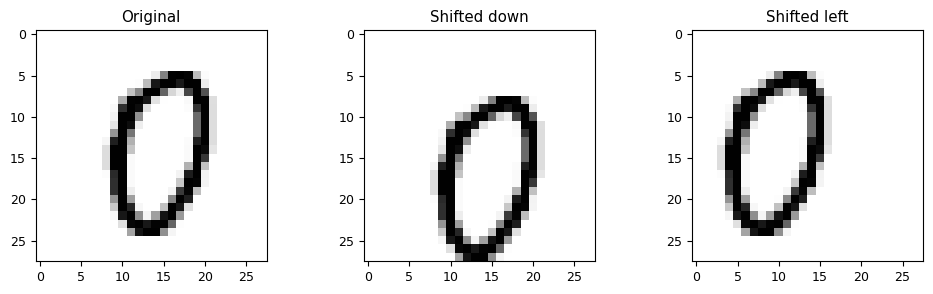

In [105]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift(image.reshape(28, 28), [3, 0], cval=0)
shifted_image_left = shift(image.reshape(28, 28), [0, -5], cval=0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [108]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights="distance")

In [107]:
grid_search.best_params_

{'knn__n_neighbors': 4, 'knn__weights': 'distance'}

In [109]:
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [112]:
y_test_pred_aug = knn_clf.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred_aug)
# knn_clf.score(X_test, y_test)

0.9763

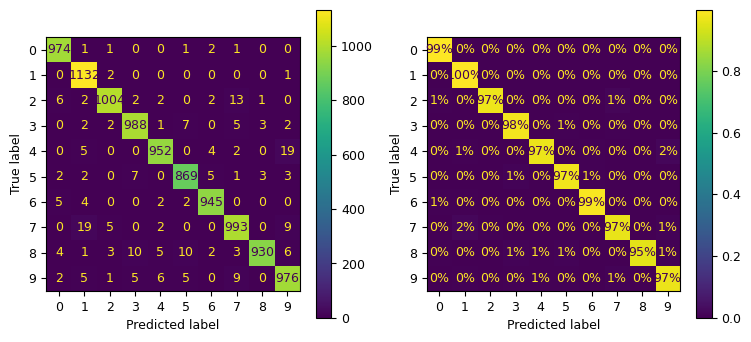

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sample_weight = (y_test_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_aug, ax=axs[0])
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_aug, ax=axs[1],
                                        normalize="true", values_format=".0%")

Text(0.5, 1.0, 'Errors normalized by row')

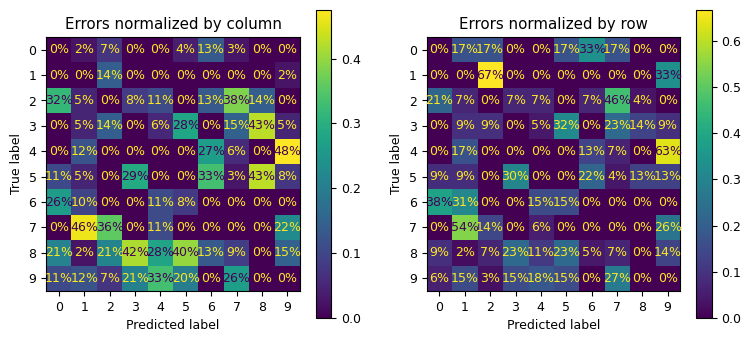

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
sample_weight = (y_test_pred_aug != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_aug, ax=axs[0], sample_weight=sample_weight, normalize="pred", values_format=".0%")
axs[0].set_title("Errors normalized by column")
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_aug, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[1].set_title("Errors normalized by row")